## 1. Importing required libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import io
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
pip install ucimlrepo

## 2. Loading the data into a dataframe

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset from https://archive.ics.uci.edu/dataset/1/abalone
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

#combine features and target(s)
df = pd.concat([X, y], axis=1)

#Check if it is loaded
print(df.head())

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [ ]:
# Add age (target) which is rings + 1.5
# Drop column rings (prevent data leakage, as it's the direct value that determines the age)

df['Age'] = df.Rings + 1.5
df = df.drop(columns='Rings')
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## 3. Exploring the data

In [ ]:
# quick summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [ ]:
# counts of types of data/ class distribution
df.dtypes.value_counts()

,count
float64,8
object,1


Results:
- 1 categorical column, 8 numeric

In [ ]:
# statistics for every numerical column
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [ ]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()  # Count of null values in each column
print(missing_values)

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
age_bin           0
dtype: int64


Data is complete with no missing values, do not need to drop any columns.

In [ ]:
# check number of unique values
df.nunique().to_frame("# of unique values")

,# of unique values
Sex,3
Length,134
Diameter,111
Height,51
Whole_weight,2429
Shucked_weight,1515
Viscera_weight,880
Shell_weight,926
Age,28


Most of the attributes are numeric, thus the high number of unique values. Only 'Sex' is categorical, with only 3 unique values

## 4. Data Visualization

<Axes: >

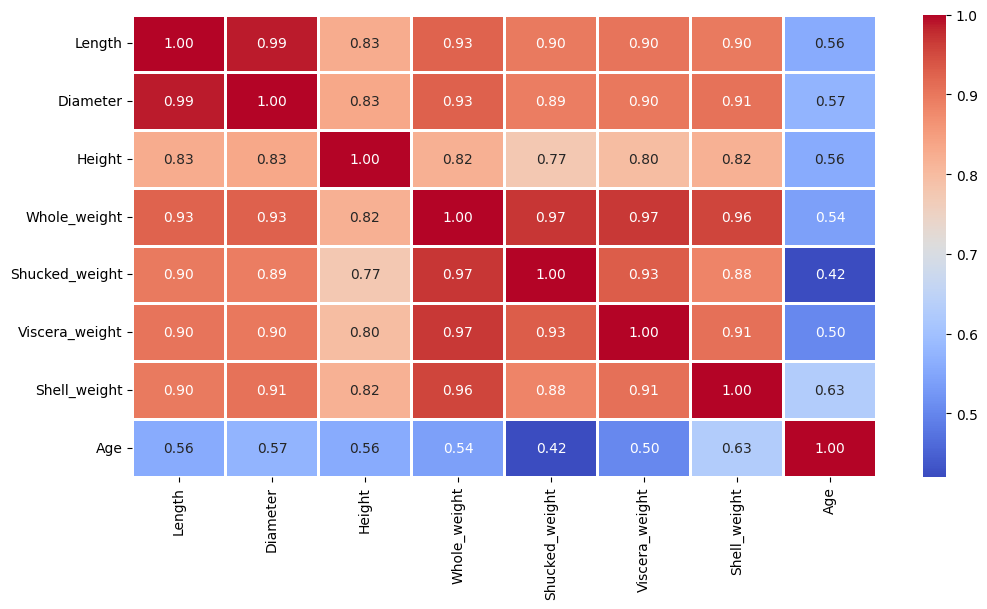

In [ ]:
# Display heatmap that plots correlation matrix between numerical attributes of df
# Selects only numeric columns (int and float) from DataFrame df.
# The result numerical_df excludes categorical columns like category, body, etc

numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_df.corr(),
            cmap = 'coolwarm',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

Results:
- Heatmap shows the r value, which is how closely 2 numbers are correlated
- Blue boxes indicate slightly lower correlation between 2 attributes. As they are mostly still > 0.5, we consider them strong and will not be removing them during pre-processing.
- The closer the colour is to red, the higher the correlation. For example, shucked weight and whole weight have a high positive relationship. It is likely that as shucked weight increases, the whole weight will increase as well.
- Correlation doesn't capture nonlinear relationships and is sensitive to outliers, so we can look at other features to improve the prediction.

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole_weight'}>,
        <Axes: title={'center': 'Shucked_weight'}>,
        <Axes: title={'center': 'Viscera_weight'}>],
       [<Axes: title={'center': 'Shell_weight'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

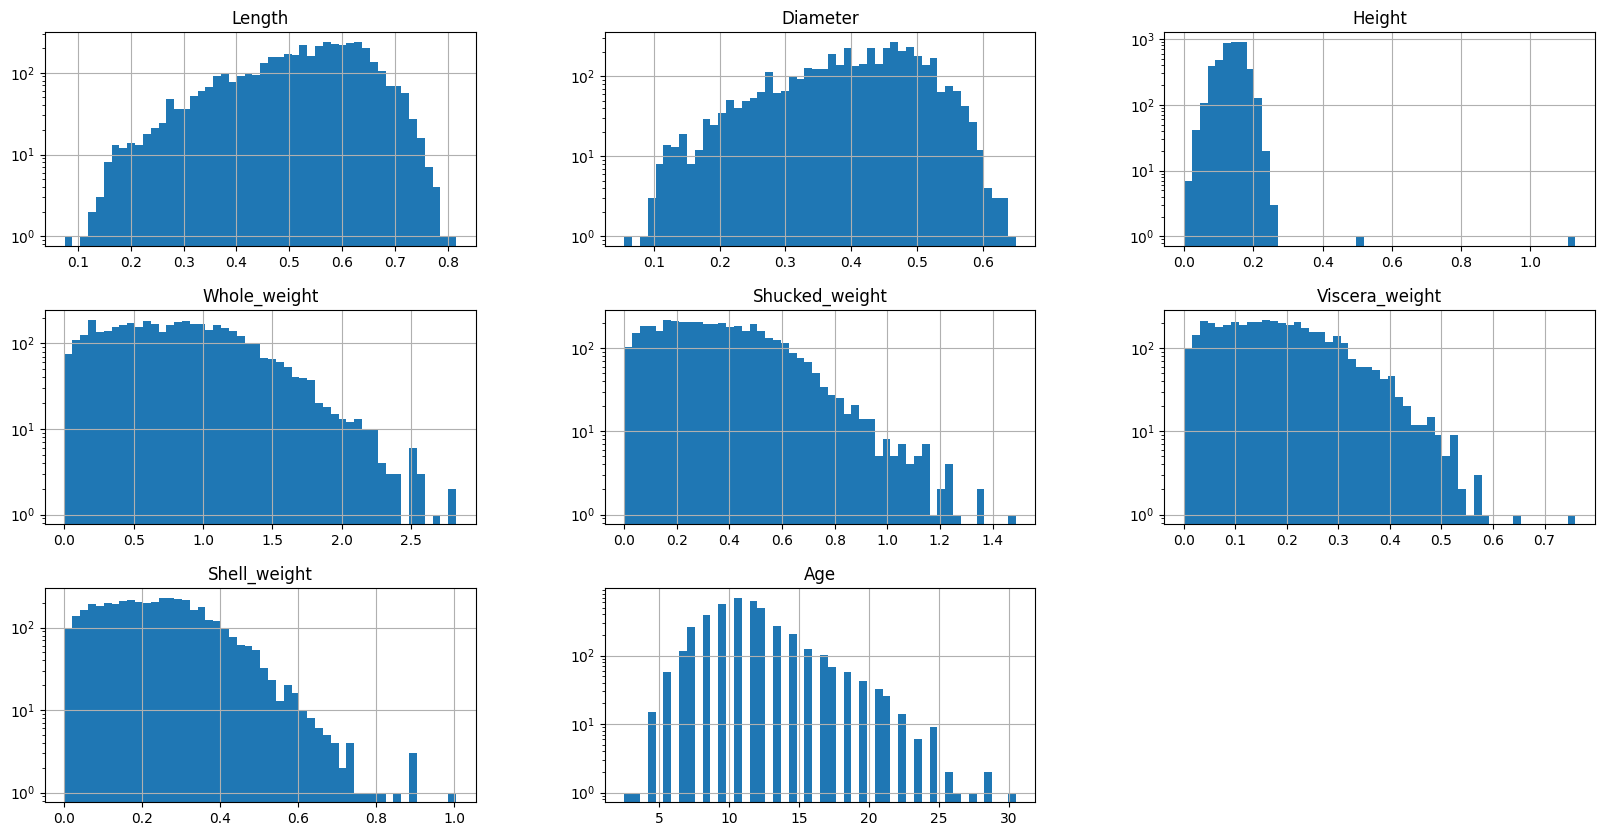

In [ ]:
# Plotting histograms for all numeric columns to check for noise

df.hist(bins=50, figsize=(20,10), log=True)

Results:

We see that most of the data are normally distributed. We see a potential extreme outlier in height that we will need to remove before training the models.

In [ ]:
outlier_rows = df[df["Height"] > 1]
print(outlier_rows)

     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
2051   F   0.455     0.355    1.13         0.594           0.332   

      Viscera_weight  Shell_weight  Age  
2051           0.116        0.1335  9.5  


In [ ]:
# drop row by index
df = df.drop(2051)

df.shape[0] #expected 4177 - 1 = 4176

4176

In [ ]:
# check that there are no more outlier rows after removal

outlier_rows = df[df["Height"] > 1]
print(outlier_rows)

Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole_weight, Shucked_weight, Viscera_weight, Shell_weight, Age]
Index: []


## 5. Pre-processing the data

In [ ]:
# Preparing data by splitting into training and testing sets using stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

# bin continuous attribute price
df["age_bin"] = pd.qcut(df["Age"], q=5, labels=False)

# using 20% for testing, and random seed 42 for reproducability
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# .split() generates indices / row numbers
for train_index, test_index in split.split(df, df["age_bin"]):
    strat_train = df.iloc[train_index].copy() #full training set
    strat_test = df.iloc[test_index].copy() #full test set

# drop age_bin
strat_train.drop(columns=["age_bin"], inplace=True)
strat_test.drop(columns=["age_bin"], inplace=True)

# split into features and class
X_train = strat_train.drop(columns=["Age"])
y_train = strat_train["Age"]
X_test = strat_test.drop(columns=["Age"])
y_test = strat_test["Age"]

print("X_train shape:", X_train.shape) # (7998,14) shows 7998 rows, 14 columns
print("X_test shape:", X_test.shape) # (2000,14) shows 2000 rows, 14 columns
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3340, 8)
X_test shape: (836, 8)
y_train shape: (3340,)
y_test shape: (836,)


In [ ]:
# check proportions of bins
print("Original dataset age_bin distribution:")
print(df["age_bin"].value_counts(normalize=True).sort_index())

print("\nTraining set distribution:")
train_bins = pd.qcut(y_train, q=5, labels=False, duplicates='drop')
print(train_bins.value_counts(normalize=True).sort_index())

print("\nTesting set distribution:")
test_bins = pd.qcut(y_test, q=5, labels=False, duplicates='drop')
print(test_bins.value_counts(normalize=True).sort_index())

# results show that the distributions are about the same, so the stratified sampling worked.

Original dataset age_bin distribution:
age_bin
0    0.200910
1    0.300766
2    0.151820
3    0.180556
4    0.165948
Name: proportion, dtype: float64

Training set distribution:
Age
0    0.200898
1    0.300898
2    0.151796
3    0.180539
4    0.165868
Name: proportion, dtype: float64

Testing set distribution:
Age
0    0.200957
1    0.300239
2    0.151914
3    0.180622
4    0.166268
Name: proportion, dtype: float64


In [ ]:
# Create preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# define numerical and categorical attributes in dataset (Excluding target)
num_attributes = ["Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight"] #numeric column names
cat_attributes = ["Sex"] #categorical column name

# pipeline for numerical attributes
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()) # normalisation using z-score
    ])

# pipeline for categorical attributes
cat_pipeline = Pipeline([
        ('encoder', OneHotEncoder(handle_unknown="ignore", sparse_output=False)) # convert categorical to numeric
    ])

# each branch processes a subset of data
pre_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attributes), #applies to numerics
        ("cat", cat_pipeline, cat_attributes), #applies to categorical
    ])

In [ ]:
# for SGDRegressor, we list the column names to check against coefficients results later
feature_names = X_train.columns
print(feature_names)


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'],
      dtype='object')


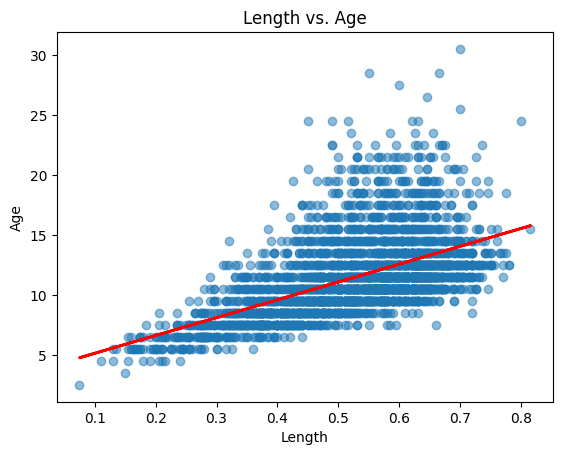

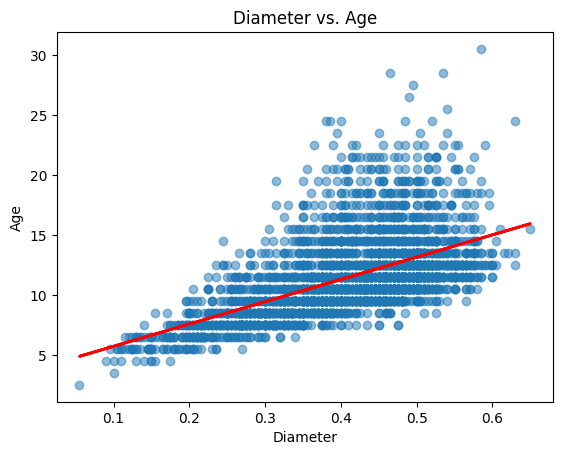

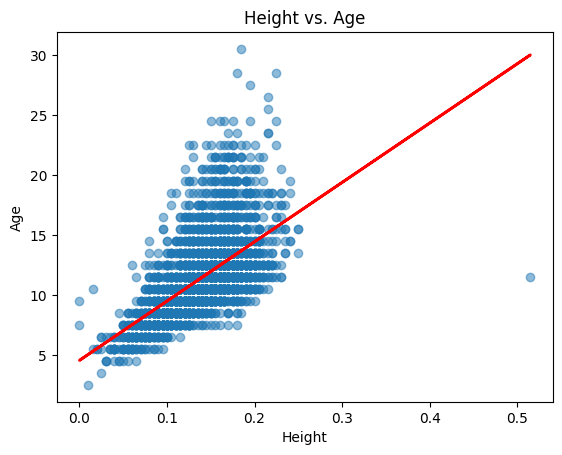

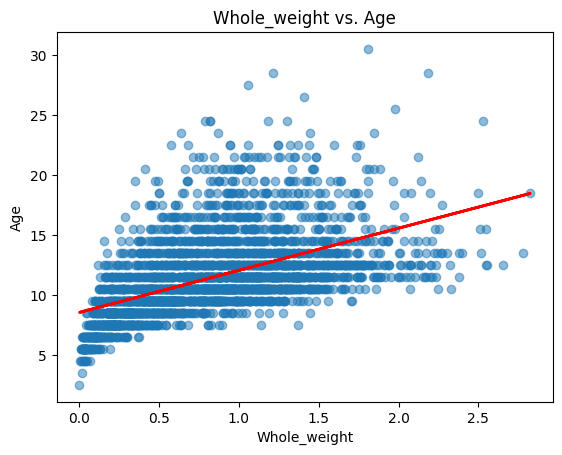

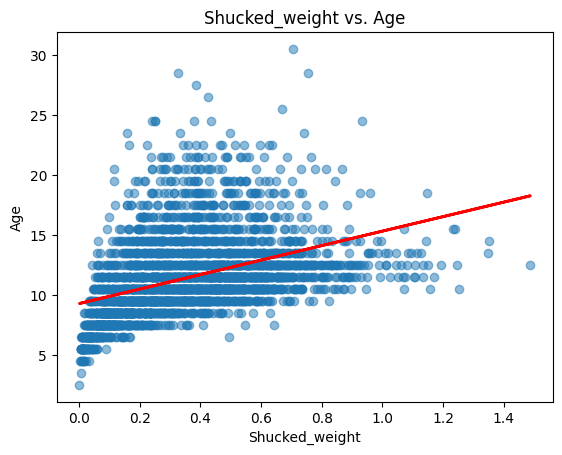

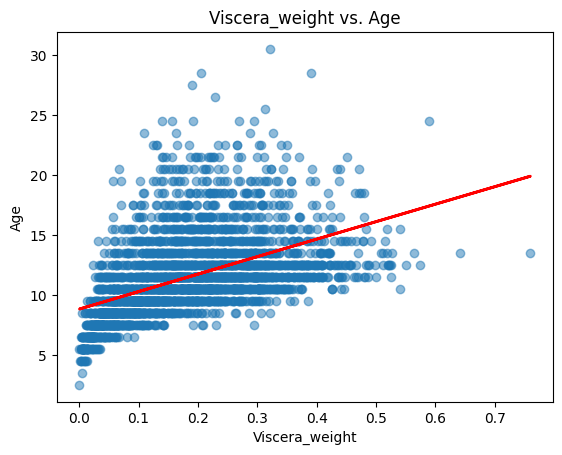

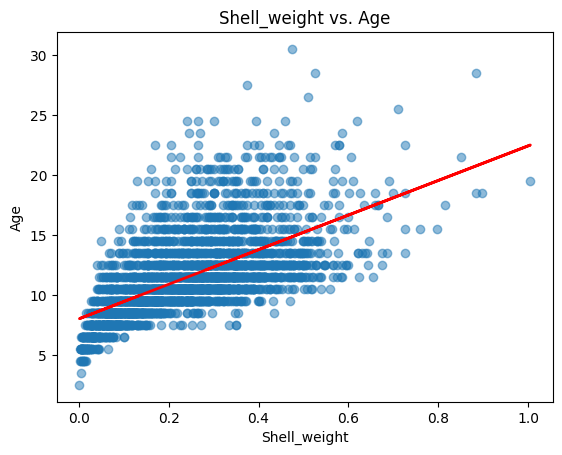

In [ ]:
# also, we plot scatter plots to explore the relationship between the features and age
# using the training set.
import matplotlib.pyplot as plt
import numpy as np

# select numeric columns only
numeric_cols = X_train.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure()
    plt.scatter(X_train[col], y_train, alpha=0.5)

    # fit a linear line
    coef = np.polyfit(X_train[col], y_train, deg=1)
    poly1d_fn = np.poly1d(coef)
    plt.plot(X_train[col], poly1d_fn(X_train[col]), color='red', linewidth=2)

    plt.xlabel(col)
    plt.ylabel("Age")
    plt.title(f"{col} vs. Age")
    plt.show()


The plots show a roughly straight-line trend between all the features and age.

## Select and train models

In [ ]:
# SGD Linear Regression
# Decision Tree Regressor
# Random Forest Regressor
# run these 3 models on training set
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# build a pipeline with each model
def build_pipeline(model):
    return Pipeline([
        ('preprocessor', pre_pipeline), # preprocessing pipeline
        ('model', model)
    ])

# create instance of model and build pipelines
lr_model = SGDRegressor()
lr_pipeline = build_pipeline(lr_model)

dt_model = DecisionTreeRegressor(random_state=42)
dt_pipeline = build_pipeline(dt_model)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pipeline = build_pipeline(rf_model)

In [ ]:
# evaluate models on training set using cross validation
# by splitting data into multiple train/ test sets and averaging results
# we get a more reliable estimate of performance
from sklearn.model_selection import cross_val_score

def evaluate_model_custom(model):
  # this function returns evaluation metrics for each model passed in
  model_name = model.named_steps['model'].__class__.__name__
  scores = cross_val_score(model, X_train, y_train, \
                          scoring="neg_mean_squared_error", cv=5)
  #use MSE as evaluation metric, 5-fold cross validation
  rmse_scores = np.sqrt(-scores) #negates negative MSE scores back to positive
  print (f"{model_name} RMSE: {rmse_scores} \n Mean RMSE: {rmse_scores.mean()} \n Standard deviation RMSE: {rmse_scores.std()}")

evaluate_model_custom(lr_pipeline)
evaluate_model_custom(dt_pipeline)
evaluate_model_custom(rf_pipeline)


SGDRegressor RMSE: [2.39872863 2.1315093  2.15667477 2.21762044 2.30972214] 
 Mean RMSE: 2.2428510557994006 
 Standard deviation RMSE: 0.09922649015412217
DecisionTreeRegressor RMSE: [3.10567377 2.97217636 3.00124725 2.8701958  2.91804216] 
 Mean RMSE: 2.973467069499441 
 Standard deviation RMSE: 0.07998611266444666
RandomForestRegressor RMSE: [2.37876987 2.08451792 2.13776305 2.21670407 2.28996571] 
 Mean RMSE: 2.2215441252168757 
 Standard deviation RMSE: 0.10509074642348545


Result:     
Based on our RMSE is telling us how far our model's predicted abalone age is from the actual age using 5 fold cross validation

The Mean RMSE shows the average prediction error, while the standard deviation shows how consistent the model is across the 5 folds.

Linear Regression (SGDRegressor) : Mean RMSE : 2.24, while STD 0.09. This means the model performs quite well with predictions roughly 2.24 years off on average, while the low standard deviation show the model is stable and consistent meaning the linear relationships in the data are captured reasonably well.

Decision Tree : Mean RMSE : 2.97, while STD 0.08, this is the highest error among all three models even though its standard deviation is low but the overall error is too high, showing that a single tree cannot generalise well, often overfitting or underfitting depending on the fold.

Random Forest : Mean RSME : 2.22 while STD 0.10. This is the best performing model among all three models with the lowest average error. Random forest works well because it combines many decision trees, which reduces overfitting and learn more stable, more balanced patterns compared to a single tree

Overall our results show that Random Forest performs the best out of the three models (RMSE 2.22) followed closely by the Linear Model (RMSE 2.24). While Decision Tree is the highest error among the tree model

Next we will fine-tune the Random Forest by adjusting hyperparameters to futher improve its performance.

## Fine Tune the model

Baseline RMSE: 3.1540261022631206

Training Model: Linear Regression


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stocha

Best params: {'model__tol': 1e-05, 'model__penalty': None, 'model__max_iter': 10000, 'model__learning_rate': 'adaptive', 'model__eta0': 0.5, 'model__alpha': 0.01}
Best model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole_weight',
                                                   'Shucked_weight',
                                                   'Viscera_weight',
                                                   'Shell_weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotE

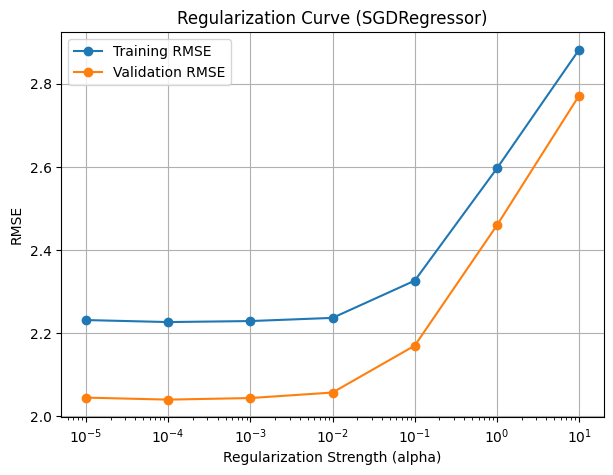

Final RMSE on Test Set: 2.0247685265777133
Final MAE on Test Set: 1.49050476635207
Final R-squared on Test Set: 0.5877567830256398
Model coefficients: [-0.08903799  0.88613913  0.84647995  4.22185366 -4.27019522 -1.16903417
  1.12186514  3.07752265  2.2984382   3.20086968]
Model intercept: [8.57627132]


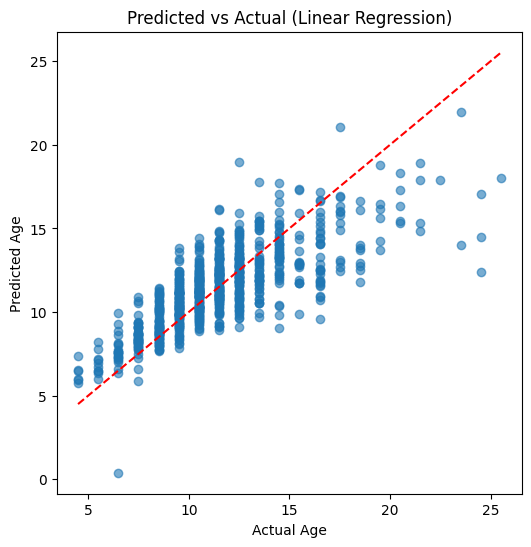


Training Model: Decision Tree
Best params: {'model__min_samples_split': np.int64(2), 'model__min_samples_leaf': np.int64(19), 'model__max_depth': 10, 'model__criterion': 'squared_error'}
Best model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole_weight',
                                                   'Shucked_weight',
                                                   'Viscera_weight',
                                                   'Shell_weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                 

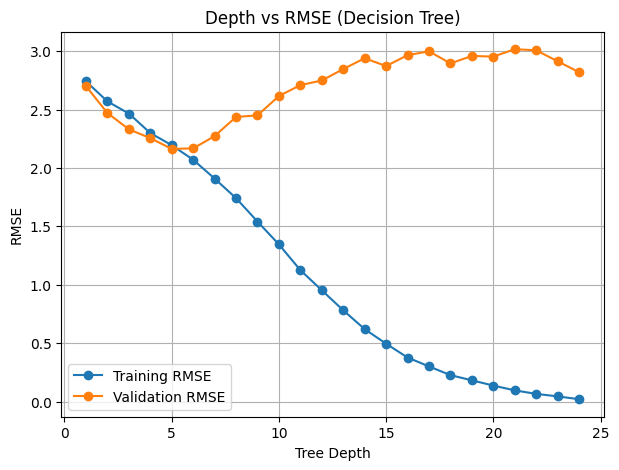

Final RMSE on Test Set: 2.170038061321994
Final MAE on Test Set: 1.5331413995542194
Final R-squared on Test Set: 0.5264809473781096

Training Model: Random Forest
Best params: {'model__n_estimators': 300, 'model__min_samples_split': np.int64(18), 'model__min_samples_leaf': np.int64(13), 'model__max_depth': 50, 'model__criterion': 'friedman_mse', 'model__bootstrap': True}
Best model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole_weight',
                                                   'Shucked_weight',
                                                   'Viscera_weight',
                                                   'Shell_weight'])

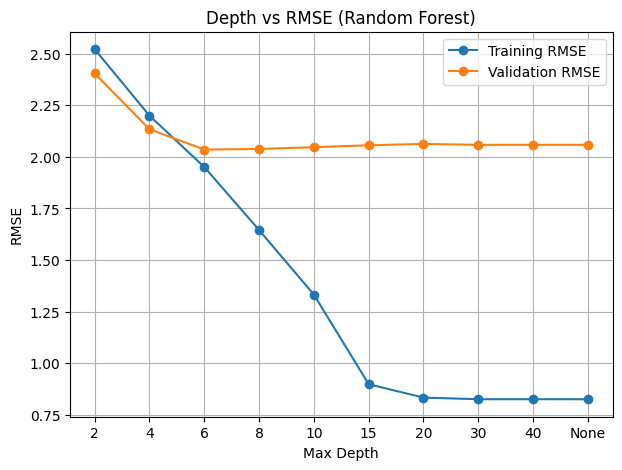

Final RMSE on Test Set: 1.9975274098035563
Final MAE on Test Set: 1.4155605361770334
Final R-squared on Test Set: 0.5987747555176199


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt

# baseline RMSE stats
baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train, y_train)
baseline_preds = baseline.predict(X_test)

print("Baseline RMSE:", np.sqrt(mean_squared_error(y_test, baseline_preds)))


# fine tuning by testing the other models and other hyperparameters
models = {
    "Linear Regression": SGDRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}


# sample range of values for these parameters
min_samples_split_values = np.arange(2, 20)  # from 2 to 19
min_samples_leaf_values = np.arange(1, 20)   # from 1 to 19

# add new hyperparameters
param_grid_new = {
    "Linear Regression": {
        'model__penalty': [None, 'l2', 'l1', 'elasticnet'], # regularization type
        'model__alpha': [0.0001, 0.001, 0.01], # regularization strength
        'model__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], # learning rate schedule
        'model__eta0': [0.01, 0.1, 0.5], # initial learning rate
        'model__tol': [1e-3, 1e-4, 1e-5],  # stopping tolerance
        'model__max_iter': [2000, 5000, 10000] # no. of iterations
    },
    "Random Forest": {
        'model__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],   # impurity measures
        'model__n_estimators': [50, 100, 200, 300, 500],
        'model__max_depth': [None, 10, 20, 30, 50, 70], # control max depth of tree for DT and RF, to prevent overfitting (Pre-pruning)
        'model__min_samples_split': min_samples_split_values, # min samples to split an internal node
        'model__min_samples_leaf': min_samples_leaf_values, # min samples required to be at a leaf node
        'model__bootstrap': [True, False] # add regularisation toggle
    },
    "Decision Tree": {
        'model__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': min_samples_split_values,
        'model__min_samples_leaf': min_samples_leaf_values
    }
}

# grid search which also returns best model
for name, model in models.items():
    print("\n==========================")
    print(f"Training Model: {name}")
    print("==========================")

    pipeline = build_pipeline(model) # build pipeline for model
    param_grid = param_grid_new[name] # get correct grid for model

    grid_search_new = RandomizedSearchCV(pipeline, param_grid, cv=3,
        return_train_score=True,
        scoring='neg_root_mean_squared_error')

    # fit to training data
    grid_search_new.fit(X_train, y_train)

    # print best model and best parameters
    print("Best params:", grid_search_new.best_params_)
    print("Best model:", grid_search_new.best_estimator_)
    print("Best RMSE:", -grid_search_new.best_score_)

    # extract and print all results as a dataframe
    results = pd.DataFrame(grid_search_new.cv_results_)

    # show only relevant columns and print all RMSEs
    display_cols = [col for col in results.columns if 'param_' in col or 'mean_test_score' in col]
    results_display = results[display_cols].copy()
    results_display['mean_test_RMSE'] = -results_display['mean_test_score']

    print("\nAll RMSEs for each parameter combination:")
    print(results_display.sort_values('mean_test_RMSE'))

    # ---- plot overfitting by varying model complexity
    if isinstance(model, SGDRegressor):
      alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
      train_rmse_list, val_rmse_list = [], []

      for a in alphas:
          model_tuned = build_pipeline(SGDRegressor(alpha=a, max_iter=5000, tol=1e-4))
          model_tuned.fit(X_train, y_train)

          y_pred_train = model_tuned.predict(X_train)
          y_pred_val = model_tuned.predict(X_test)

          train_rmse_list.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
          val_rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred_val)))

      plt.figure(figsize=(7,5))
      plt.semilogx(alphas, train_rmse_list, 'o-', label='Training RMSE')
      plt.semilogx(alphas, val_rmse_list, 'o-', label='Validation RMSE')
      plt.xlabel("Regularization Strength (alpha)")
      plt.ylabel("RMSE")
      plt.title("Regularization Curve (SGDRegressor)")
      plt.legend()
      plt.grid(True)
      plt.show()

    if isinstance(model, DecisionTreeRegressor):
      depths = range(1, 25)
      train_rmse_list, val_rmse_list = [], []

      for d in depths:
          model_tuned = build_pipeline(DecisionTreeRegressor(max_depth=d, random_state=42))
          model_tuned.fit(X_train, y_train)

          y_pred_train = model_tuned.predict(X_train)
          y_pred_val = model_tuned.predict(X_test)

          train_rmse_list.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
          val_rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred_val)))

      plt.figure(figsize=(7,5))
      plt.plot(depths, train_rmse_list, 'o-', label='Training RMSE')
      plt.plot(depths, val_rmse_list, 'o-', label='Validation RMSE')
      plt.xlabel("Tree Depth")
      plt.ylabel("RMSE")
      plt.title("Depth vs RMSE (Decision Tree)")
      plt.legend()
      plt.grid(True)
      plt.show()

    if isinstance(model, RandomForestRegressor):
      depths = [2, 4, 6, 8, 10, 15, 20, 30, 40, None]
      train_rmse_list, val_rmse_list = [], []

      for d in depths:
          rf = build_pipeline(RandomForestRegressor(max_depth=d, n_estimators=100, random_state=42))
          rf.fit(X_train, y_train)

          y_pred_train = rf.predict(X_train)
          y_pred_val = rf.predict(X_test)

          train_rmse_list.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
          val_rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred_val)))

      plt.figure(figsize=(7,5))
      plt.plot([str(d) for d in depths], train_rmse_list, 'o-', label='Training RMSE')
      plt.plot([str(d) for d in depths], val_rmse_list, 'o-', label='Validation RMSE')
      plt.xlabel("Max Depth")
      plt.ylabel("RMSE")
      plt.title("Depth vs RMSE (Random Forest)")
      plt.legend()
      plt.grid(True)
      plt.show()



    # ---- final predictions: predict age for X_test
    final_predictions = grid_search_new.best_estimator_.predict(X_test)

    # evaluation scores
    final_mse = mean_squared_error(y_test, final_predictions)
    final_rmse = np.sqrt(final_mse)
    final_mae = mean_absolute_error(y_test, final_predictions)
    final_r2 = r2_score(y_test, final_predictions)

    print("Final RMSE on Test Set:", final_rmse)
    print("Final MAE on Test Set:", final_mae)
    print("Final R-squared on Test Set:", final_r2)

    # --- for linear model only: print coefficients and plot predicted vs actual scatter plot
    model_in_pipeline = grid_search_new.best_estimator_.named_steps['model']
    if isinstance(model_in_pipeline, SGDRegressor):
        print("Model coefficients:", model_in_pipeline.coef_)
        print("Model intercept:", model_in_pipeline.intercept_)

        plt.figure(figsize=(6,6))
        plt.scatter(y_test, final_predictions, alpha=0.6)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel("Actual Age")
        plt.ylabel("Predicted Age")
        plt.title(f"Predicted vs Actual ({name})")
        plt.show()


Results:
- We evaluate based on RMSE, where lower means better performance.
- Baseline RMSE: 3.15
- **Linear regression:** final test RMSE is 2.02 with parameters: ```{'model__tol': 1e-05, 'model__penalty': None, 'model__max_iter': 10000, 'model__learning_rate': 'adaptive', 'model__eta0': 0.5, 'model__alpha': 0.01}```.

- **Decision tree:** final test RMSE is 2.17 with parameters:  ```{'model__min_samples_split': np.int64(2), 'model__min_samples_leaf': np.int64(19), 'model__max_depth': 10, 'model__criterion': 'squared_error'}```

- **Random forest:** best RMSE is 1.99 with parameters: ``` {'model__n_estimators': 300, 'model__min_samples_split': np.int64(18), 'model__min_samples_leaf': np.int64(13), 'model__max_depth': 50, 'model__criterion': 'friedman_mse', 'model__bootstrap': True}```

- We will explore the reasons for the difference in performance in our report. Overall, decision tree is the weakest with the highest RMSE. Random Forest is th best model that handles both non-linear and linear relationships, making it the most robust and accrate model for predicting abalone age in our dataset. By averaging across 300 trees, this helps to average results, preventing overfitting, and reducing variance from any one feature dominating.


- Looking at the curves:
- LR: Both training RMSE and validation RMSE are increasing, but converging. As alpha (regularization strength) increases, the model is being penalised more strongly. Converging lines shows that the model is not overfitting, and both RMSE curves are close to each other.
- DT:Training RMSE is decreasing while validation RMSE is increasing as tree depth increases. This shows overfitting as tree depth increases, where the model is memorising the training data well, leading to high training RMSE. On the other hand, the model is not generalising well to unseen data as the validation RMSE is poor. The large gap shows strong sense of overfitting.
- RF: Training RMSE decreases and plateaus, and validation RMSE decreases then plateaus too. This shows that the forest is generally stable and not wildly overfitting. Adding more depth doesn't improve predictions after max depth of about 15 for both. However, the significant gap between both RMSE shows that the model is not fully generalising, and there is still some overfitting since validation RMSE is higher than training RMSE.

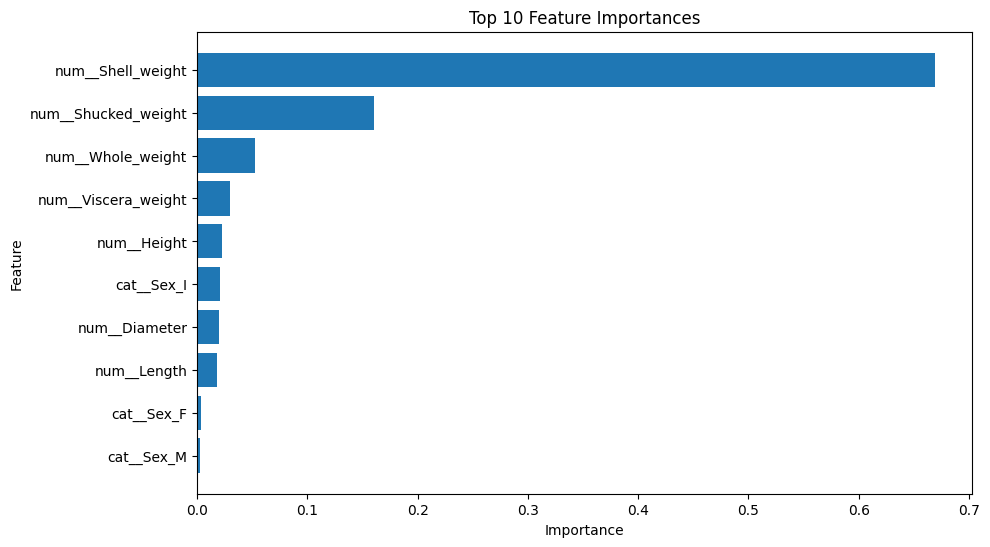

In [ ]:
# feature importance
# shows the relative importance of each feature used by the model. higher value = more important feature which
# contributed more to model's decisions

# extract feature importances from randomforest model (best one from gridsearchCV above)
best_rf = grid_search_new.best_estimator_
importances = best_rf.named_steps['model'].feature_importances_
feature_names = best_rf.named_steps['preprocessor'].get_feature_names_out() #feature names

# get top 10 feature importances (ascending order)
top_indices = np.argsort(importances)[-10:]
top_features = feature_names[top_indices]
top_importances = importances[top_indices]

# plot bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Results:
- Top 10 features which contribute to making accurate predictions.
- Shell weight is the strongest predictor contributing almost 0.70 to the overall importance.
- Next, most important features are shucked weight, whole weight and viscera weight. All of these weight-based measurements are correct as heavier abalone tend to be older
- Features like diameter, height and length still contribute to our prediction but their importance is much lower compared to weight features since size grow at a slower rate once abalones reach maturity

- The least important features is their Sex (F,M,I) because biological sex does not show any significantly effect on age estimation in this dataset

- Overall weight-related are the most important features.